# Assignment I
## Moore's law
#### Importing CPU benchmark data

In [86]:
import csv
import datetime as dt

BNCHMRK = "126.gcc"

cpu_date = []
base_res = []

def format_dt(cpu_name):
    new_name = cpu_name[cpu_name.find('-') + 1:]
    if new_name.find('-') == 6:
        if '5' < new_name[0] <= '9':
            new_name = '19' + new_name
        else:
            new_name = '20' + new_name

    new_name = new_name[:new_name.find('-')]
    
    return dt.datetime.strptime(new_name, "%Y%m%d")

with open('specs/benchmarks.txt') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        if row[1] == BNCHMRK:
            if row[0][0] != 'p':
                cpu_date.append(format_dt(row[0]))
                base_res.append(float(row[2]))
                 
print(len(cpu_date))

494


#### Plotting CPU benchmark data

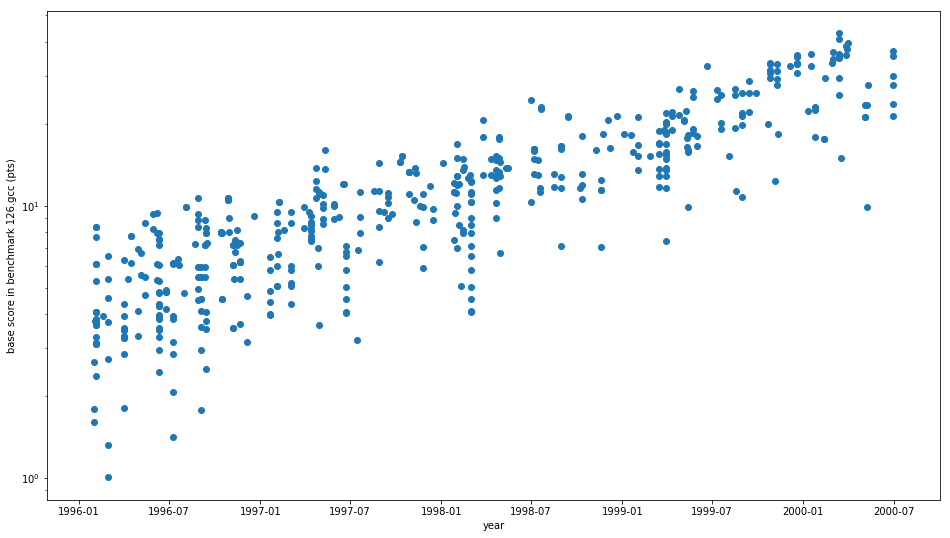

In [87]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,9))
plt.scatter(cpu_date, base_res)
plt.xlabel('year')
plt.yscale('log')
plt.ylabel('base score in benchmark 126.gcc (pts)')
plt.show()

***Fig 1*: Base scores in 126.gcc benchmark in computers from Jan 1996 to July 2000, plotted with a logarirthmic y-axis.**

#### Tranforming exponential growth rate to linear

In [91]:
import math

'''
    Moore's law depicts that the increase in speed is two times every 2 years, we can
    take log base 2 of benchmark results to get a linear growth to fit with a linear model
'''
def logify(arr):
    log_arr = list(map(lambda elem: math.log(elem, 2), arr))
    return log_arr

#### Training a linear regression

In [92]:
import numpy as np
from sklearn import linear_model

cpu_date_col = list(map(lambda x: [int(round(x.timestamp()))], cpu_date))

cpu_date_train = cpu_date_col[:-84]
cpu_date_test = cpu_date_col[-84:]

base_res_train = base_res[:-84]
base_res_test = base_res[-84:]

regr = linear_model.LinearRegression()
regr.fit(cpu_date_train, logify(base_res_train))

base_res_pred_test = regr.predict(cpu_date_test)
print(regr.coef_, regr.intercept_)

[2.13858093e-08] -15.54159137100719


#### Plotting regression line

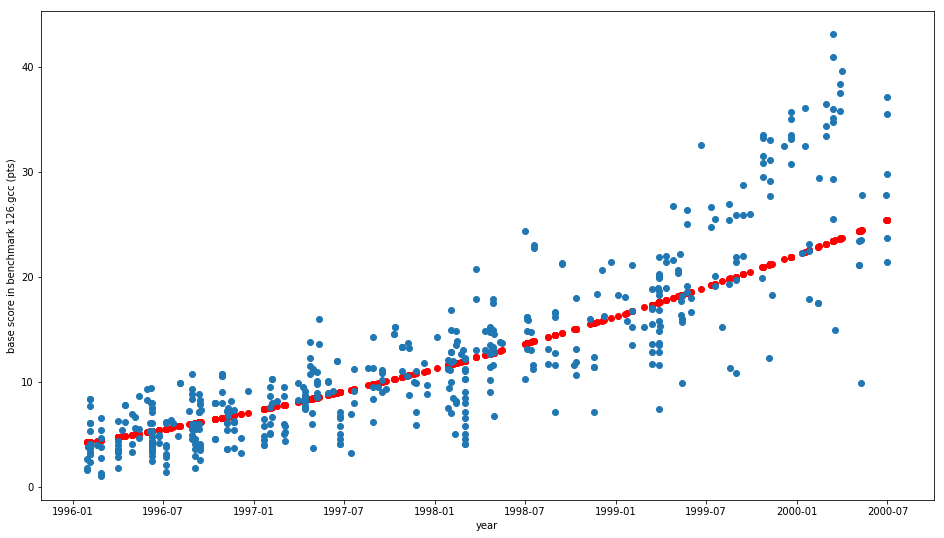

In [93]:
# squaring the linear prediction to get the actual predicted benchmark score
base_res_pred = (regr.predict(cpu_date_col))**2

plt.figure(figsize=(16,9))
plt.scatter(cpu_date, base_res_pred, color="red")
plt.scatter(cpu_date, base_res)
plt.xlabel('year')
plt.ylabel('base score in benchmark 126.gcc (pts)')
plt.show()

***Fig 2*: Same as Figure 1, just plotted on a linear y-axis. Red line represents the linear regression line.**

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

print("Root of mean squared error: %.2f" % mean_squared_error(base_res_test, base_res_pred_test)**.5, "pts")

Root of mean squared error: 10.52 pts


Looking at the plot, it seems like Moore's law follows the exponential growth. Even though our RMSE above is quite large, relative to the benchmark score range, it is because there is a big standard deviation in the actual scores (e.g., because budget computers remaining relatively the same speed, whereas faster computers are growing faster).

## MNIST Digits

#### Importing MNIST images

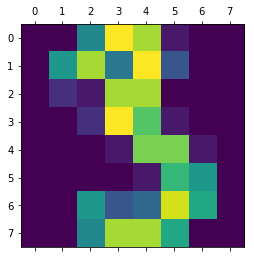

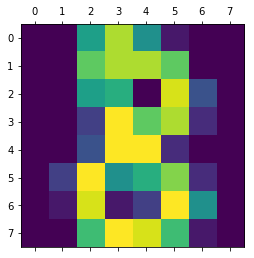

In [94]:
from sklearn.datasets import load_digits

digits = load_digits()
data = []
trgt = []

for i in range(len(digits.target)): # slice it bruh
    if digits.target[i] == 3 or digits.target[i] == 8:
        data.append(digits.data[i])
        trgt.append(digits.target[i])

plt.matshow(digits.images[3]) 
plt.matshow(digits.images[8])
plt.show()

***Fig 3*: Sample of digits from the MNIST dataset. Top is 3, bottom is 8.**

#### Training kNN

In [118]:
from sklearn import neighbors

k = 3

data_train = data[:-72]
data_test = data[-72:]

trgt_train = trgt[:-72]
trgt_test = trgt[-72:]

clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(data_train, trgt_train)

trgt_pred = clf.predict(data_test)

In [119]:
print("Error rate is:", 1 - sum(trgt_pred == trgt_test) / len(trgt_test))

Error rate is: 0.02777777777777779


Pretty good, 3%!

## Exercises
#### 1.14
1. Let's find expected win for any "ticket" or unordered set of 4 digits, assuming that the the lottery winning combination is a uniformly random 4 numbers. Then, we would divide the prize pool by the total number of available combinations.
$$num_{comb} = {{9}\choose{4}} = 126$$
$$E(1 \space comb | ticket) = \dfrac{10^6}{126} = \dfrac{5*10^5}{63} [£] $$

2. For combination {3, 5, 7, 9} we know that there are 1 in 100 people taking, meaning, that if that number was to win, we would have to divide £$10^6$ by $10^6/100 = 10000$ (since we have 1M people participating, so 10000 people are taking {3, 5, 7, 9}). The expected change in amount of money for this combitation is then
$$E(\{3, 5, 7, 9\}) = E(ticket) + E(1 \space comb | ticket)/10000 = -1 + \dfrac{5*10^5}{63*10^4} = -\dfrac{13}{63} [£] $$

3. For {1, 2, 3, 4}, we can apply similar calculations, but we would divide the prize by $10^6/10000 = 100$
$$E(\{1, 2, 3, 4\}) = E(ticket) + E(1 \space comb | ticket)/100 = -1 + \dfrac{5*10^5}{63*100} = \dfrac{4937}{63} = 78 \dfrac{23}{63} [£]$$

As we can see, the expected return for the rarest combination $\{1, 2, 3, 4\}$ is positive, meaning, that we expect to earn $78 \dfrac{23}{63} £$ each week if we play with this combitation. This makes sense because the chance to win for any combination is equal, but if there are more people taking a number and that number were to win, we would have to divide the prize.

#### 13.5
First of all, I am skeptical that they have zero test error on every learning problem posted on the Internet $\to$ there is a possibility that they mixed in their test set in the training process. Even if that was true, I think this network would not be useful, for the following reasons:
1. It's big but its size is still limited, meaning that the level of its variance is capped at some point. This means that now if we have a new problem with a feature space of trillion trillion (or even two trillion), this neural network will be high bias (underfit) and fail to match the performance
2. On the other hand, given that this network is so big, we would have to feed it a lot of data, or it would overfit and not generalize well to test sets. This is a problem because not all problems have a lot of data (e.g, predicting the behavior of leukemia, or blood cancer, given that only recently we started knowing about this disease and collecting data).
3. Because this network is so big, buying it now (in 2019) makes no sense because it would take very very very long to train. Given that there are a trillion hidden units, there are many many many more parameters (weights) that we have to train. Even storing this model requires large supercomputers.
4. Lastly, most data we have are observational, meaning, that they show correlation between input variables and outputs (dependence of car accidents on the percentage of drinking population). From data alone, we might infer that more car accidents causes more drinking (which is not true). This is a simple case, but in cases when we have many many dimensions and we would like to make predictive inferences, we need causality. Having a cool neural network would not help in this case.